### Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [54]:
df.columns = df.columns.str.strip()

In [3]:
len(df)

50

In [4]:
df.shape

(50, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [56]:
dict = {'R&D Spend' : 'rd_spend',
        'Administration' : 'administration',
        'Marketing Spend' : 'marketing_spend',
        'State' : 'state',
        'Profit' : 'profit',
        }

In [57]:
df.rename(columns=dict,inplace=True)

In [58]:
df.columns

Index(['rd_spend', 'administration', 'marketing_spend', 'state', 'profit'], dtype='object')

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.duplicated().sum()

0

In [59]:
df.describe()

,rd_spend,administration,marketing_spend,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


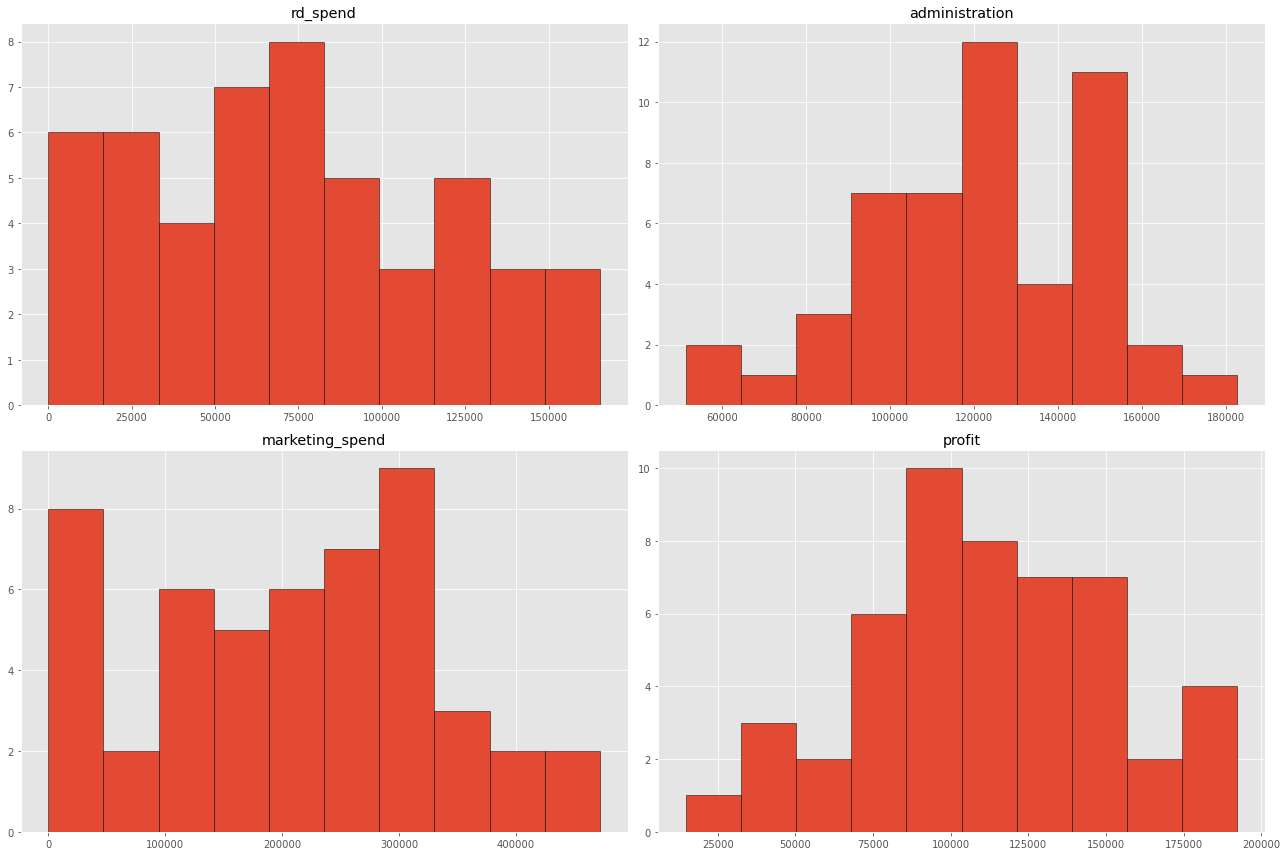

In [60]:
df.hist(edgecolor='k',figsize=(18,12))
plt.tight_layout();

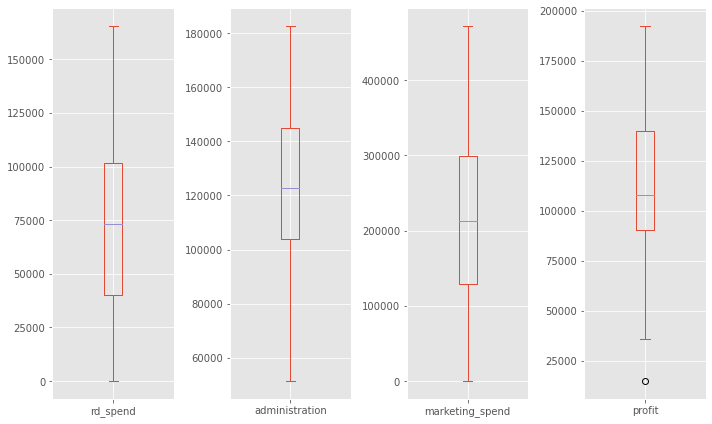

In [61]:
df.plot(kind='box',subplots=True,figsize=(10,6))
plt.tight_layout();

<font color='maroon'><b><I>There are no outliers in the predictor variables.

In [14]:
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

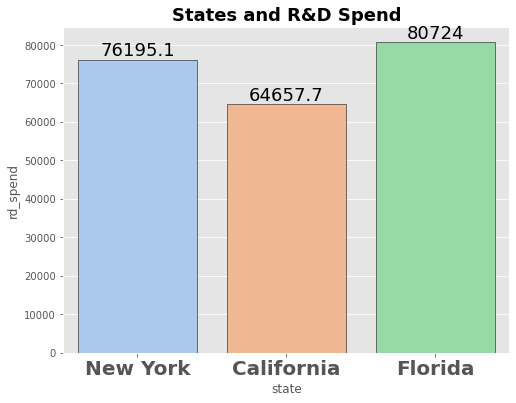

In [62]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df, x='state', y='rd_spend', palette='pastel', edgecolor='black',ci=False)
plt.xticks(fontsize=20,fontweight='bold')
plt.title('States and R&D Spend',fontsize=18,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)

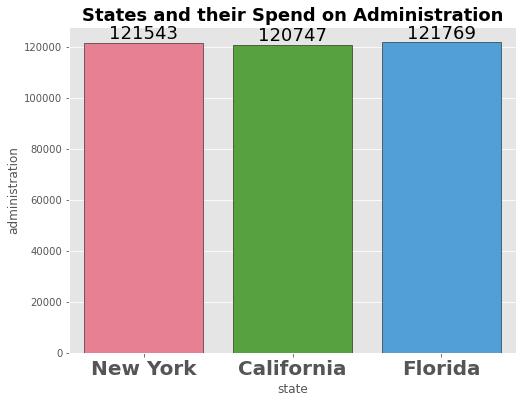

In [63]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df, x='state', y='administration', palette='husl', edgecolor='black',ci=False)
plt.xticks(fontsize=20,fontweight='bold')
plt.title('States and their Spend on Administration',fontsize=18,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)

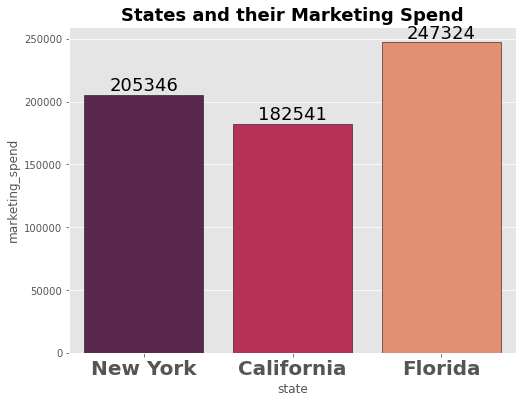

In [64]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df, x='state', y='marketing_spend', palette='rocket', edgecolor='black',ci=False)
plt.xticks(fontsize=20,fontweight='bold')
plt.title('States and their Marketing Spend',fontsize=18,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)

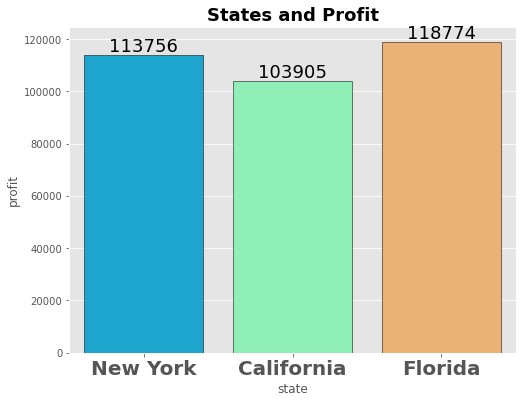

In [65]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df, x='state', y='profit', palette='rainbow', edgecolor='black',ci=False)
plt.xticks(fontsize=20,fontweight='bold')
plt.title('States and Profit',fontsize=18,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)

<font color='maroon'><b>Assumptions of Linear Regression :
    
<font color='maroon'><b><I>-- Linear relationship between the dependent and the independent variables
    
<font color='maroon'><b><I>-- Normally distributed error component
    
<font color='maroon'><b><I>-- No multicollinearity
    
<font color='maroon'><b><I>-- No heteroskedasticity, the variance of residuals must be constant across the predicted values

## <font color='orange'><b>Check for Multicollinearity :

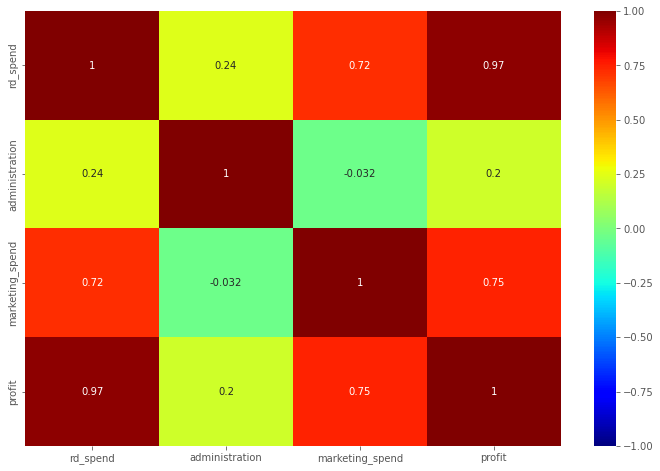

In [66]:
correlation = df.select_dtypes(include='float64').corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=correlation,
           vmin=-1,vmax=1,cmap='jet',
           annot=True);

<font color='maroon'><b>The target variable Profit is positively correlated with RandD Spend and Marketing Spend.
    
<font color='maroon'><b>And the predictor variables Marketing spend and RandD Spend have positive correlation.    

### <font color='red'><b><I>Finding corresponding Eigen values and Eigen vectors :

In [47]:
w, v = np.linalg.eig(correlation)
w

array([2.6721757 , 0.02589406, 0.28254244, 1.01938779])

<font color='maroon'><b><I>If one or more of the eigen values is close to zero we identify collinearity in the data. Here none of the values are that close to zero. So collinearity is absent.Yet checking the eigen vector of the value that is lowest here,0.02.

In [48]:
v[:,1]

array([ 0.69905629, -0.02558964,  0.0275629 , -0.71407686])

<font color='maroon'><b><I>It shows collinearity only between RandD Spend and Profit where latter is a target variable.    

<Figure size 1440x1440 with 0 Axes>

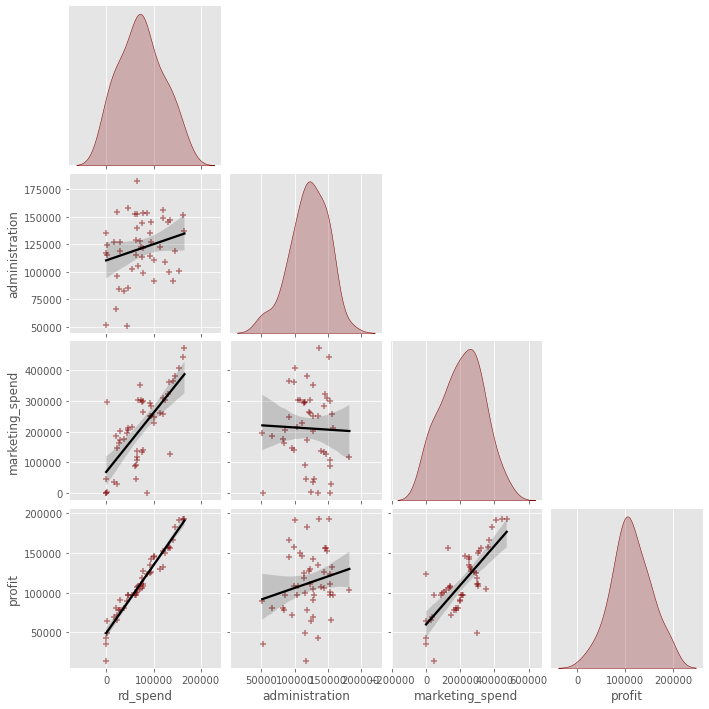

In [68]:
plt.figure(figsize=(20,20))
sns.pairplot(df,markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'black'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': 'maroon'}},
               corner=True,
                 diag_kws= {'color': 'maroon'})
plt.show()

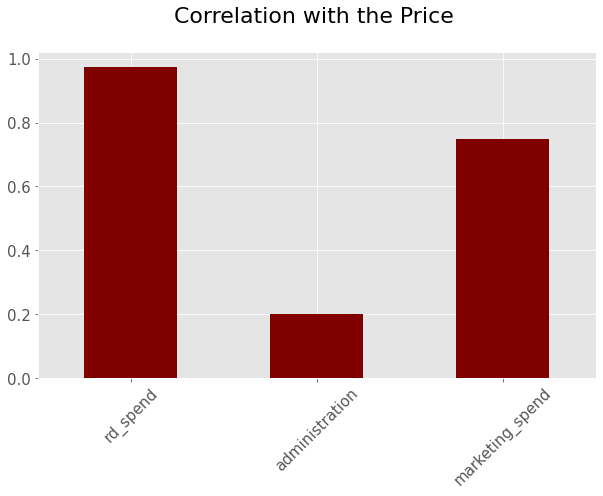

In [69]:
data2 = df.copy()

correlations = data2.corrwith(df.profit)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (10,6), 
        fontsize = 15, 
        color = 'maroon',
        rot = 45, grid = True)
plt.title('Correlation with the Price \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif");

## <font color='purple'><b>Get dummies for Categorical data :

In [123]:
df_enc = df.copy()
df_enc = pd.get_dummies(data=df_enc,columns=['state'],drop_first=True)
df_enc.head()

,rd_spend,administration,marketing_spend,profit,state_Florida,state_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


## <font color='green'><b>Multiple Linear Regression :

### <font color='brown'><b><I>with Raw data :

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
lr = LinearRegression()

In [131]:
x = df_enc.drop(['profit'],axis=1)
y = df_enc['profit']

In [132]:
x.head()

,rd_spend,administration,marketing_spend,state_Florida,state_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [133]:
lr.fit(x,y)

LinearRegression()

In [134]:
lr.intercept_

50125.34383160419

In [135]:
lr.coef_

array([ 8.06023114e-01, -2.70043196e-02,  2.69798610e-02,  1.98788793e+02,
       -4.18870191e+01])

In [137]:
coeff = pd.DataFrame(lr.coef_,x.columns,columns=['Coefficients'])
coeff

,Coefficients
rd_spend,0.806023
administration,-0.027004
marketing_spend,0.026980
state_Florida,198.788793
state_New York,-41.887019


<font color='maroon'><b><I>The sign of each coefficient indicates the direction of the relationship between predictor variable and the response variable.
    
<font color='maroon'><b><I>  -- positive sign indicates positive correlation
    
<font color='maroon'><b><I>  -- negative indicates negative correlation

In [138]:
import statsmodels.api as sm

In [139]:
x_sm = sm.add_constant(x)
model_raw = sm.OLS(y,x_sm).fit()

In [140]:
print(model_raw.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           1.34e-27
Time:                        05:31:09   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.013e+04   6884.820     

### <font color='brown'><b><I>With Box-Cox Transformation :

In [150]:
df2 = df_enc.copy()
df2 = df2.drop(['profit'],axis=1)
#y= df2['profit']

In [151]:
# since the data contains 0 values adding one to each value to get rid of 0 values

x_bc = [col for col in df2 if df2[col].dtype.kind != 'O']
x_bc
df2[x_bc] += 1
df2.head()

,rd_spend,administration,marketing_spend,state_Florida,state_New York
0,165350.20,136898.80,471785.10,1,2
1,162598.70,151378.59,443899.53,1,1
2,153442.51,101146.55,407935.54,2,1
3,144373.41,118672.85,383200.62,1,2
4,142108.34,91392.77,366169.42,2,1


In [152]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer 

#Box-Cox Transform
column_trans = ColumnTransformer(
    [('rd_spend', PowerTransformer(method='box-cox', standardize=True), ['rd_spend']),
     ('administration', PowerTransformer(method='box-cox', standardize=True), ['administration']),
     ('marketing_spend', PowerTransformer(method='box-cox', standardize=True), ['marketing_spend']),
     ('state_Florida', PowerTransformer(method='box-cox', standardize=True), ['state_Florida']),
     ('state_New York', PowerTransformer(method='box-cox', standardize=True), ['state_New York'])
    ])

transformed_boxcox = column_trans.fit_transform(df2)

df_bc = pd.DataFrame(transformed_boxcox, columns=x.columns)

df_bc.head()

,rd_spend,administration,marketing_spend,state_Florida,state_New York
0,1.562570,0.529102,1.580363,-0.685994,1.393261
1,1.527028,1.131285,1.451634,-0.685994,-0.717741
2,1.406784,-0.790378,1.279964,1.457738,-0.717741
3,1.284497,-0.174305,1.157809,-0.685994,1.393261
4,1.253427,-1.106257,1.071572,1.457738,-0.717741


In [153]:
df_bc = df_bc.join(y)
x_bc = df_bc.drop(['profit'],axis=1)

In [156]:
x_sm_bc = sm.add_constant(x_bc)
model_bc = sm.OLS(y,x_sm_bc).fit()

In [157]:
print(model_bc.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     105.6
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           2.34e-23
Time:                        05:47:51   Log-Likelihood:                -536.53
No. Observations:                  50   AIC:                             1085.
Df Residuals:                      44   BIC:                             1097.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             1.12e+05   1668.406     

### <font color='brown'><b><I>with Yeo-Jhonson Transformation :

In [158]:
column_trans = ColumnTransformer(
    [('rd_spend', PowerTransformer(method='yeo-johnson', standardize=True), ['rd_spend']),
     ('administration', PowerTransformer(method='yeo-johnson', standardize=True), ['administration']),
     ('marketing_spend', PowerTransformer(method='yeo-johnson', standardize=True), ['marketing_spend']),
     ('state_Florida', PowerTransformer(method='box-cox', standardize=True), ['state_Florida']),
     ('state_New York', PowerTransformer(method='box-cox', standardize=True), ['state_New York'])
    ])

transformed_yj = column_trans.fit_transform(df2)

df_yj = pd.DataFrame(transformed_yj, columns=x.columns)

df_yj.head()

,rd_spend,administration,marketing_spend,state_Florida,state_New York
0,1.576714,0.529102,1.601610,-0.685994,1.393261
1,1.540538,1.131285,1.469756,-0.685994,-0.717741
2,1.418202,-0.790378,1.294102,1.457738,-0.717741
3,1.293873,-0.174305,1.169244,-0.685994,1.393261
4,1.262298,-1.106257,1.081167,1.457738,-0.717741


In [159]:
df_yj = df_yj.join(y)
x_yj = df_yj.drop(['profit'],axis=1)

In [160]:
x_sm_yj = sm.add_constant(x_yj)
model_yj = sm.OLS(y,x_sm_yj).fit()

In [161]:
print(model_yj.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     109.5
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           1.13e-23
Time:                        06:24:58   Log-Likelihood:                -535.70
No. Observations:                  50   AIC:                             1083.
Df Residuals:                      44   BIC:                             1095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             1.12e+05   1640.750     

### <font color='brown'><b><I>with Quantile Transformation :

In [162]:
x_q = x.copy()
from sklearn.preprocessing import QuantileTransformer

def unique_values(x):
    return x.unique().tolist()

qt = QuantileTransformer()
    
transformed_qt = qt.fit_transform(x_q)

df_q = pd.DataFrame(transformed_qt, columns=x.columns)

df_q.head()

,rd_spend,administration,marketing_spend,state_Florida,state_New York
0,1.000000,0.693878,1.000000,0.0,1.0
1,0.979592,0.836735,0.979592,0.0,0.0
2,0.959184,0.224490,0.959184,1.0,0.0
3,0.938776,0.448980,0.938776,0.0,1.0
4,0.918367,0.122449,0.918367,1.0,0.0


In [163]:
df_q = df_q.join(y)
x_q = df_q.drop(['profit'],axis=1)

In [166]:
x_sm_q = sm.add_constant(x_q)
model_q = sm.OLS(y,x_sm_q).fit()

In [167]:
print(model_q.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     125.4
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           7.12e-25
Time:                        06:34:19   Log-Likelihood:                -532.54
No. Observations:                  50   AIC:                             1077.
Df Residuals:                      44   BIC:                             1089.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.724e+04   4485.359     

### <font color='brown'><b><I>with Log Transformation :

In [177]:
df_log = df_enc.copy()
df_log = df_log.rename({'state_New York':'state_NewYork'},axis=1)
df_log.head()

,rd_spend,administration,marketing_spend,profit,state_Florida,state_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [174]:
import statsmodels.formula.api as smf 

In [178]:
model_log = smf.ols('np.log(profit)~np.log(rd_spend+administration+marketing_spend+state_Florida+state_NewYork)',data=df_log).fit()

In [179]:
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(profit)   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     85.69
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           2.98e-12
Time:                        07:15:15   Log-Likelihood:                -6.3475
No. Observations:                  50   AIC:                             16.70
Df Residuals:                      48   BIC:                             20.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

### <font color='brown'><b><I>with Squareroot Transformation :

In [180]:
model_sqrt = smf.ols('np.sqrt(profit)~np.sqrt(rd_spend+administration+marketing_spend+state_Florida+state_NewYork)',data=df_log).fit()

In [181]:
print(model_sqrt.summary())

                            OLS Regression Results                            
Dep. Variable:        np.sqrt(profit)   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     126.9
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           4.47e-15
Time:                        07:16:15   Log-Likelihood:                -246.75
No. Observations:                  50   AIC:                             497.5
Df Residuals:                      48   BIC:                             501.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

### <font color='brown'><b><I>with Cuberoot Transformation :

In [182]:
model_cbrt = smf.ols('np.cbrt(profit)~np.cbrt(rd_spend+administration+marketing_spend+state_Florida+state_NewYork)',data=df_log).fit()

In [183]:
print(model_cbrt.summary())

                            OLS Regression Results                            
Dep. Variable:        np.cbrt(profit)   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     114.6
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           2.58e-14
Time:                        07:16:52   Log-Likelihood:                -133.68
No. Observations:                  50   AIC:                             271.4
Df Residuals:                      48   BIC:                             275.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

## <font color='orange'><b>Summarizing the Results :

In [184]:
data = {'MLR models':['with Box-Cox Transformation','with Yeo-Jhonson Transformation',
                      'with Quantile Transformation','with Log Transformation',
                      'with Squareroot Transformation','with Cuberoot Transformation','with Raw data'],
       'R-squared':[model_bc.rsquared,model_yj.rsquared,model_q.rsquared,model_log.rsquared,
                    model_sqrt.rsquared,model_cbrt.rsquared,model_raw.rsquared],
       'Adj.R-squared':[model_bc.rsquared_adj,model_yj.rsquared_adj,model_q.rsquared_adj,
                       model_log.rsquared_adj,model_sqrt.rsquared_adj,model_cbrt.rsquared_adj,
                       model_raw.rsquared_adj]}
Models = pd.DataFrame(data)
Models.sort_values('Adj.R-squared',ascending=False).reset_index(drop=True)

,MLR models,R-squared,Adj.R-squared
0,with Raw data,0.950752,0.945156
1,with Quantile Transformation,0.934420,0.926967
2,with Yeo-Jhonson Transformation,0.925601,0.917146
3,with Box-Cox Transformation,0.923072,0.914330
4,with Squareroot Transformation,0.725506,0.719787
5,with Cuberoot Transformation,0.704872,0.698723
6,with Log Transformation,0.640970,0.633490


<font color='peach'><b>Out of all the above models the one with raw data has highest R-squared and Adjusted R-squared values.

## <font color='orange'><b>Prediction with the Final Model :

In [119]:
import statsmodels.api as sm

df_pred = df1.copy()
df_pred = sm.add_constant(x)
df_pred['predicted_profit'] = model_raw.predict(x).round(2)
df_pred = df_pred.join(y)
df_pred = df_pred.iloc[:,[0,1,2,3,5,4]]
df_pred['error/residuals'] = df_pred['predicted_profit']-df_pred['profit']
df_pred.head()

,const,rd_spend,administration,marketing_spend,profit,predicted_profit,error/residuals
0,1.0,165349.20,136897.80,471784.10,192261.83,192521.25,259.42
1,1.0,162597.70,151377.59,443898.53,191792.06,189156.77,-2635.29
2,1.0,153441.51,101145.55,407934.54,191050.39,182147.28,-8903.11
3,1.0,144372.41,118671.85,383199.62,182901.99,173696.70,-9205.29
4,1.0,142107.34,91391.77,366168.42,166187.94,172139.51,5951.57


## <font color='orange'><b>Residual Analysis :

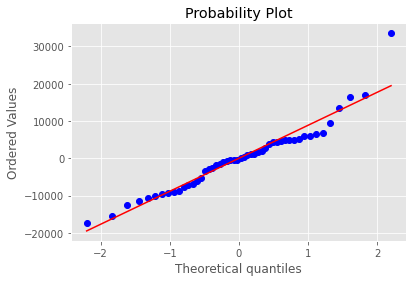

In [120]:
from scipy import stats
stats.probplot(df_pred['error/residuals'],dist='norm',plot=plt);

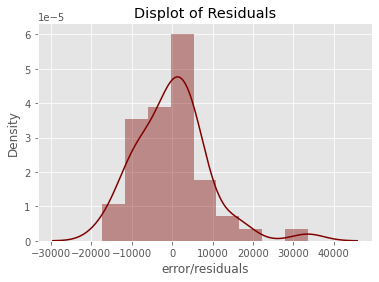

In [121]:
sns.distplot(df_pred['error/residuals'],kde=True,color='maroon')
plt.title('Displot of Residuals');

<font color='maroon'><b>The error component has normal distribution.

## <font color='orange'><b>Check for Homoscedasticity :

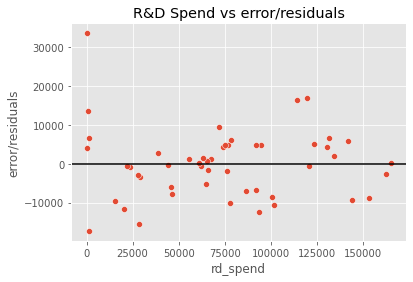

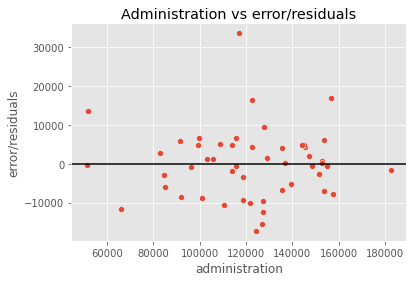

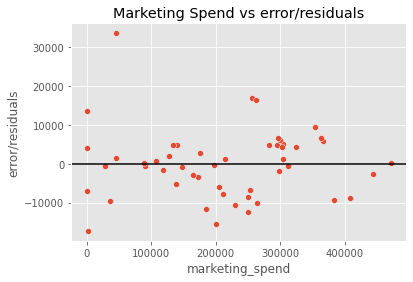

In [122]:
plt.title('R&D Spend vs error/residuals')
sns.scatterplot(data=df_pred,x='rd_spend',y='error/residuals')
plt.axhline(y=0,color='black')
plt.show()
plt.title('Administration vs error/residuals')
sns.scatterplot(data=df_pred,x='administration',y='error/residuals')
plt.axhline(y=0,color='black')
plt.show()
plt.title('Marketing Spend vs error/residuals')
sns.scatterplot(data=df_pred,x='marketing_spend',y='error/residuals')
plt.axhline(y=0,color='black')
plt.show()

<font color='maroon'><b>There is no definite pattern seen in the distribution of error values. So the model satisfies the condition of homoscedasticity.